In [1]:
#check the direction

In [2]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [3]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Work_with_MM")

# Verify the change
print(os.getcwd())


H:\Work_with_MM


In [6]:
import xarray as xr
import pandas as pd
import pandas as gpd
import regionmask
import numpy as np
import geopandas
import xarray as xr
import xarray as xr
import seaborn as sns
import rioxarray
from shapely.geometry import mapping
import netCDF4
import netCDF4 as nc
from PIL import Image
import os
from netCDF4 import Dataset
import geopandas as gpd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress
#from xarrayMannKendall import MannKendall
import pymannkendall as mk
import xarray as xr
import numpy as np
from scipy.stats import kendalltau

In [7]:
# Test the data (data of January, February, March, April_2007)

Data_Dis = xr.open_dataset("All_data_2007_2008_2009\January_February_March_April_2007.nc")

In [8]:
Data_Dis

<xarray.Dataset> Size: 18MB
Dimensions:     (valid_time: 120, latitude: 93, longitude: 103)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 960B 2007-01-02 ... 2007-05-01
    surface     float64 8B ...
  * latitude    (latitude) float64 744B 33.98 33.93 33.88 ... 29.48 29.43 29.38
  * longitude   (longitude) float64 824B 46.08 46.12 46.17 ... 51.07 51.12 51.17
    rootZone    float64 8B ...
Data variables:
    rowe        (valid_time, latitude, longitude) float32 5MB ...
    sd          (valid_time, latitude, longitude) float32 5MB ...
    swir        (valid_time, latitude, longitude) float32 5MB ...
    dis24       (valid_time, latitude, longitude) float32 5MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-03T08:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:

import xarray as xr
import os

# Folder containing all NetCDF files
folder_path = "All_data_2007_2008_2009"
output_file = "Combined_Discharge_Data_2007_2009.nc"

# List of all files to combine (in chronological order)
file_list = [
    "January_February_March_April_2007.nc",
    "May_June_July_August_2007.nc",
    "September_October_November_December_2007.nc",
    "January_February_March_April_2008.nc",
    "May_June_July_August_2008.nc",
    "September_October_November_December_2008.nc",
    "January_February_March_April_2009.nc",
    "May_June_July_August_2009.nc",
    "September_October_November_December_2009.nc"
]

# Build full file paths
full_paths = [os.path.join(folder_path, f) for f in file_list]

# Open and concatenate all datasets along time dimension
datasets = []
for path in full_paths:
    ds = xr.open_dataset(path)
    datasets.append(ds)

# Combine datasets (ensure 'valid_time' is the dimension to concatenate along)
combined_ds = xr.concat(datasets, dim="valid_time")

# Optional: Sort by time to ensure chronological order
combined_ds = combined_ds.sortby("valid_time")

# Save to a single NetCDF file
combined_ds.to_netcdf(output_file, mode="w")

print(f"✅ Success! Combined dataset saved to: {output_file}")
print(f"Total time steps: {len(combined_ds.valid_time)} | Total size: {combined_ds.nbytes / 1e9:.2f} GB")



✅ Success! Combined dataset saved to: Combined_Discharge_Data_2007_2009.nc
Total time steps: 1096 | Total size: 0.17 GB


=== DATASET SUMMARY ===
Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 1096, 'latitude': 93, 'longitude': 103})
Variables: ['rowe', 'sd', 'swir', 'dis24']
Time range: 2007-01-02T00:00:00.000000000 to 2010-01-01T00:00:00.000000000

=== KEY STATISTICS ===
Overall mean: 21.48 m³/s
Max discharge: 27059.34 m³/s
Min discharge: 0.00 m³/s
Std deviation: 217.99 m³/s


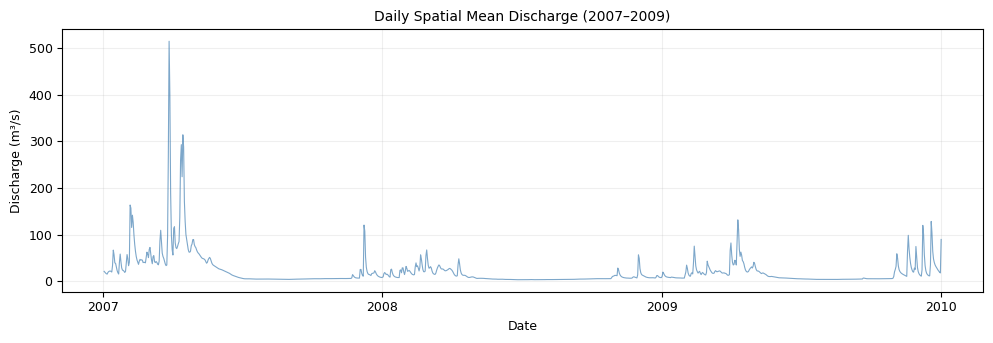

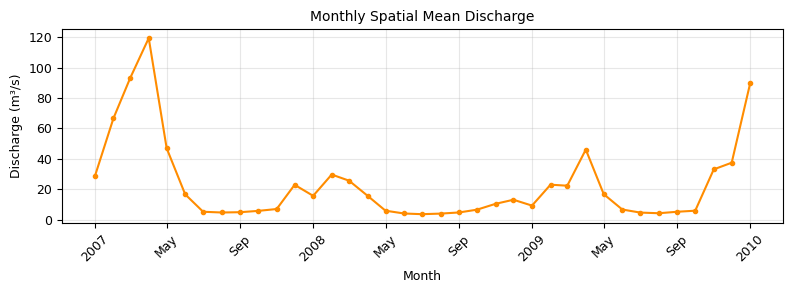

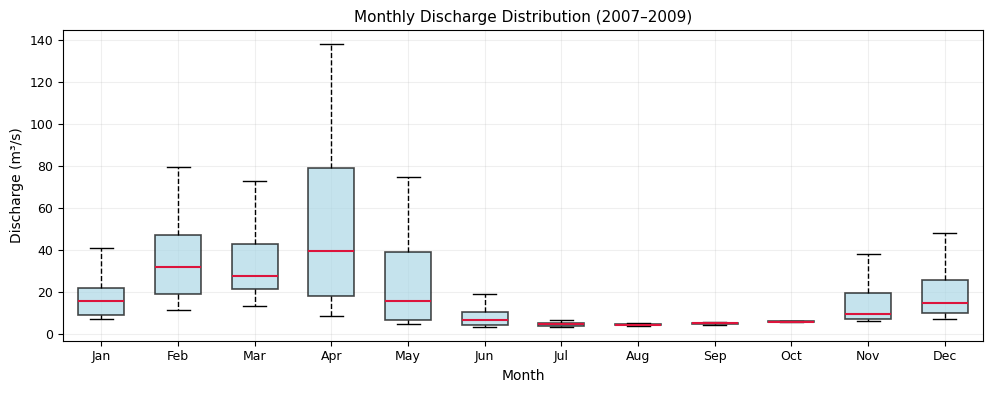

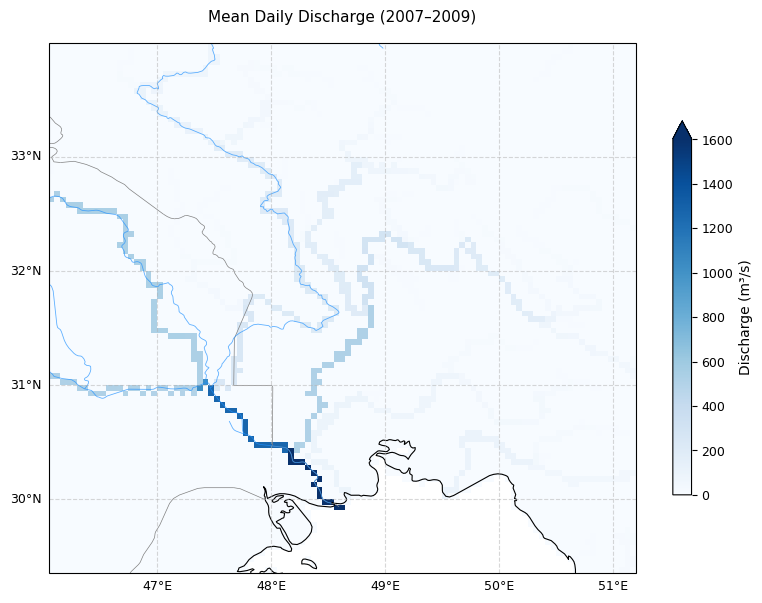

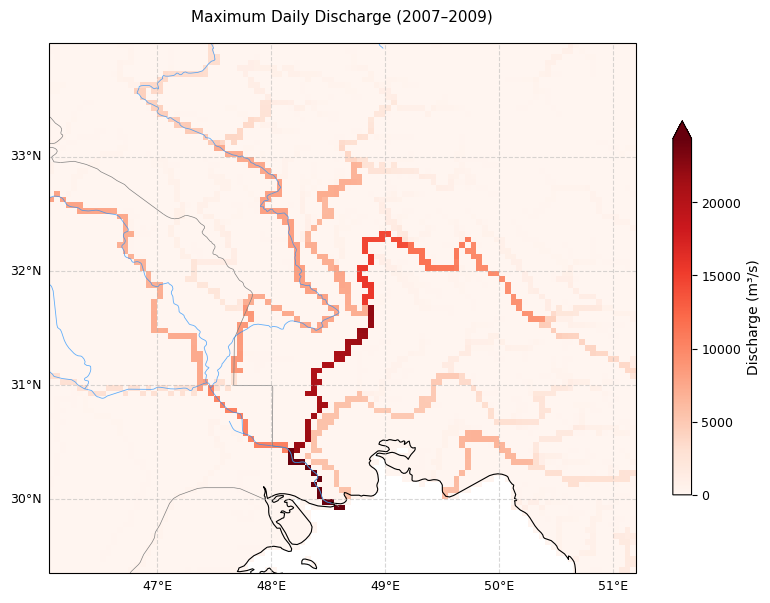


✅ Professional visualizations generated with optimized layouts!


In [17]:
# -*- coding: utf-8 -*-
"""
Enhanced Professional Analysis of Combined Discharge Data (2007–2009)
- Fixed box plot implementation
- Smaller figures with optimized layouts
- Professional font scaling
"""

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter

# Set global font sizes for consistency
SMALL_SIZE = 9
MEDIUM_SIZE = 10
LARGE_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # Controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # Font size of axes titles
plt.rc('axes', labelsize=MEDIUM_SIZE)     # Font size of axis labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('legend', fontsize=SMALL_SIZE)     # Legend font size
plt.rc('figure', titlesize=LARGE_SIZE)    # Figure title size

# ================== 1. Load Dataset ==================
file_path = r"Combined_Discharge_Data_2007_2009.nc"
Data_Dis = xr.open_dataset(file_path)

# Print full dataset information (minimalist)
print("=== DATASET SUMMARY ===")
print(f"Dimensions: {Data_Dis.dims}")
print(f"Variables: {list(Data_Dis.data_vars)}")
print(f"Time range: {Data_Dis.valid_time.min().values} to {Data_Dis.valid_time.max().values}")

# Select discharge variable
dis = Data_Dis['dis24']  # Shape: (1096, 93, 103)

# ================== 2. Basic Statistics (Cleaned) ==================
print("\n=== KEY STATISTICS ===")
print(f"Overall mean: {dis.mean().item():.2f} m³/s")
print(f"Max discharge: {dis.max().item():.2f} m³/s")
print(f"Min discharge: {dis.min().item():.2f} m³/s")
print(f"Std deviation: {dis.std().item():.2f} m³/s")

# ================== 3. Daily Time Series (Compact) ==================
plt.figure(figsize=(10, 3.5))  # Smaller figure
dis_daily_avg = dis.mean(dim=['latitude', 'longitude'])
dis_daily_avg.plot.line('steelblue', linewidth=0.8, alpha=0.7)
plt.title('Daily Spatial Mean Discharge (2007–2009)', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Date', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.2)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# ================== 4. Monthly Mean Time Series (Compact) ==================
plt.figure(figsize=(8, 3))  # Smaller figure
dis_monthly_avg = dis.resample(valid_time='MS').mean().mean(dim=['latitude', 'longitude'])
dis_monthly_avg.plot.line('darkorange', marker='o', markersize=3, linewidth=1.5)
plt.title('Monthly Spatial Mean Discharge', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Month', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================== 5. BOX PLOTS: Monthly Discharge Distribution (FIXED!) ==================
# Prepare data: Convert to DataFrame and group by month
daily_spatial_mean = dis.mean(dim=['latitude', 'longitude']).to_dataframe(name='discharge')
daily_spatial_mean['month'] = daily_spatial_mean.index.month

# Create a list of discharge values for each month
monthly_data = []
for month in range(1, 13):
    month_vals = daily_spatial_mean[daily_spatial_mean['month'] == month]['discharge'].dropna()
    monthly_data.append(month_vals)

# Create professional box plot with matplotlib
plt.figure(figsize=(10, 4))
box_plot = plt.boxplot(
    monthly_data,
    positions=range(1, 13),
    showfliers=False,  # Omit extreme outliers
    patch_artist=True,
    boxprops=dict(linewidth=1.2, facecolor='lightblue', alpha=0.7),
    medianprops=dict(linewidth=1.5, color='crimson'),
    whiskerprops=dict(linewidth=1, linestyle='--'),
    capprops=dict(linewidth=1, color='black'),
    widths=0.6
)

plt.title('Monthly Discharge Distribution (2007–2009)', fontsize=LARGE_SIZE-1)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE)
plt.xlabel('Month', fontsize=MEDIUM_SIZE)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# ================== 6. Spatial Maps (Compact Layout) ==================
def plot_spatial_map(data, title, cmap='viridis', vmin=None, vmax=None):
    plt.figure(figsize=(8, 6))  # Smaller map size
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    if vmin is None:
        vmin = data.min().item() * 0.9
    if vmax is None:
        vmax = data.max().item() * 0.9
    
    cs = data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        cbar_kwargs={'label': 'Discharge (m³/s)', 'shrink': 0.7},
        vmin=vmin,
        vmax=vmax,
        add_colorbar=True
    )
    
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth=0.6, alpha=0.7)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    plt.title(title, fontsize=MEDIUM_SIZE+1, pad=15)
    plt.tight_layout()
    plt.show()

# Mean discharge map
plot_spatial_map(
    dis.mean(dim='valid_time'),
    "Mean Daily Discharge (2007–2009)",
    cmap='Blues',
    vmin=0
)

# Max discharge map
plot_spatial_map(
    dis.max(dim='valid_time'),
    "Maximum Daily Discharge (2007–2009)",
    cmap='Reds',
    vmin=0
)

print("\n✅ Professional visualizations generated with optimized layouts!")


✅ Model data extracted at:
   Selected Latitude: 31.325000
   Selected Longitude: 48.675000
   Distance from target: 0.0083°, 0.0083°

🔍 First 5 rows of observation data:
         Date  Value
0  2006-09-21  746.0
1  2006-09-22  789.0
2  2006-09-23  586.0
3  2006-09-24  489.0
4  2006-09-25  412.0

⏱️ Common time period: 2007-01-02 to 2010-01-01
   Model data points: 1096
   Observation data points: 1096


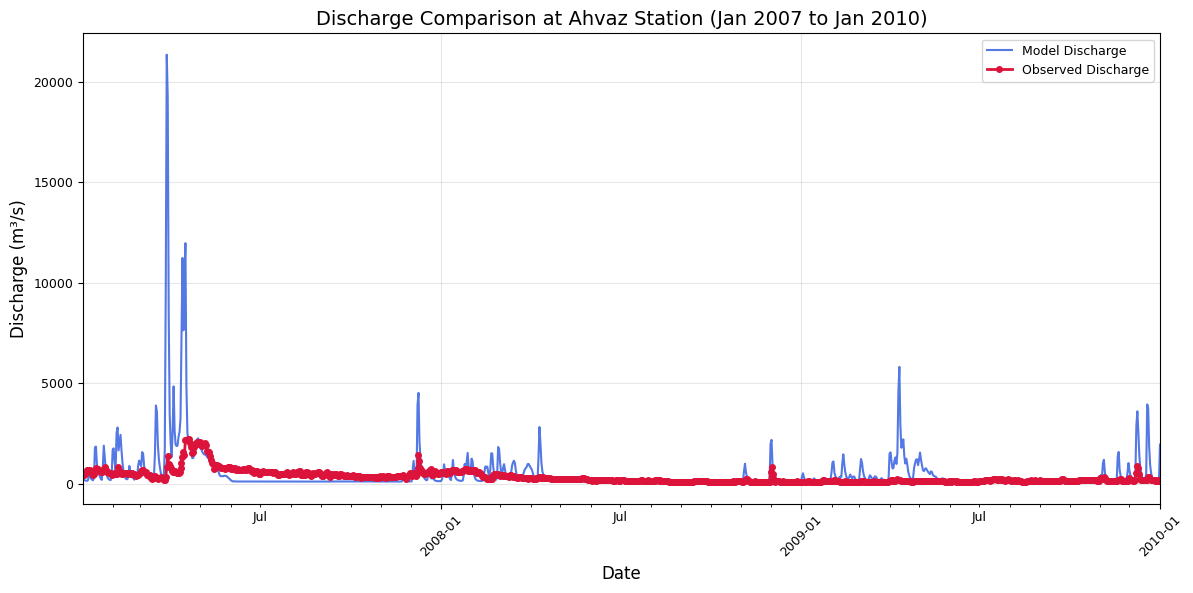


📊 Statistical Comparison:
Model Mean: 517.61 m³/s
Observed Mean: 351.24 m³/s
Mean Absolute Error (MAE): 384.85 m³/s
Root Mean Squared Error (RMSE): 1208.99 m³/s
Nash-Sutcliffe Efficiency (NSE): -12.129


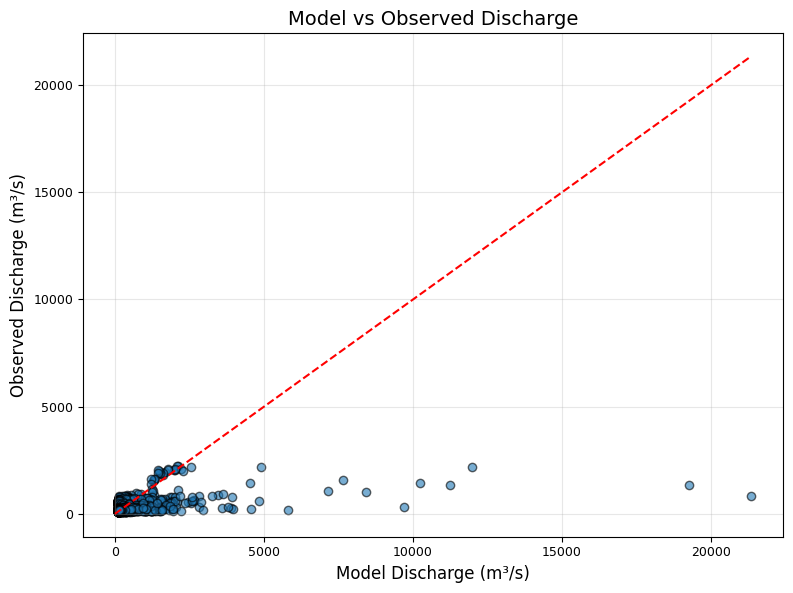


✅ Analysis complete!


In [21]:
# -*- coding: utf-8 -*-
"""
Model vs Observation Discharge Comparison at Ahvaz Station (Flexible Date Parsing!)
- Uses flexible pd.to_datetime() without format specifier
- Handles multiple date formats automatically
- Includes data inspection for verification
"""

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ================== 1. Configuration ==================
model_path = r"Combined_Discharge_Data_2007_2009.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# ================== 2. Load and Prepare Model Data ==================
ds = xr.open_dataset(model_path)
dis = ds['dis24']  # Discharge variable

# Use xarray's built-in nearest neighbor selection
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)

print(f"\n✅ Model data extracted at:")
print(f"   Selected Latitude: {model_point.latitude.values:.6f}")
print(f"   Selected Longitude: {model_point.longitude.values:.6f}")
print(f"   Distance from target: {np.abs(target_lat - model_point.latitude.values):.4f}°, "
      f"{np.abs(target_lon - model_point.longitude.values):.4f}°")

model_ts = model_point.to_dataframe(name='model_discharge')

# ================== 3. Load Observation Data (FLEXIBLE DATE PARSING) ==================
obs_df = pd.read_csv(obs_path)

# 🔍 Inspect first 5 rows to verify date format
print("\n🔍 First 5 rows of observation data:")
print(obs_df.head())

# Attempt flexible date parsing - handles multiple formats automatically
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')  # Coerce invalid parsing to NaT

# Check for parsing issues
if obs_df['Date'].isnull().any():
    num_invalid = obs_df['Date'].isnull().sum()
    print(f"⚠️ Warning: {num_invalid} dates could not be parsed. Check date formats!")

# Rename and set index
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)

# Remove rows with NaT dates if any
if obs_df.index.hasnans:
    obs_df = obs_df.dropna(subset=['obs_discharge'])  # Also ensure discharge values are present

# ================== 4. Align Time Periods ==================
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())

model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

print(f"\n⏱️ Common time period: {common_start.strftime('%Y-%m-%d')} to {common_end.strftime('%Y-%m-%d')}")
print(f"   Model data points: {len(model_common):d}")
print(f"   Observation data points: {len(obs_common):d}")

# ================== 5. Time Series Plot ==================
plt.figure(figsize=(12, 6))
model_common['model_discharge'].plot(label='Model Discharge', color='royalblue', linewidth=1.5, alpha=0.9)
obs_common['obs_discharge'].plot(label='Observed Discharge', color='crimson', linewidth=2, marker='o', markersize=4)

plt.title(f'Discharge Comparison at Ahvaz Station ({common_start.strftime("%b %Y")} to {common_end.strftime("%b %Y")})', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================== 6. Statistical Comparison ==================
if len(model_common) > 0 and len(obs_common) > 0:
    merged = pd.merge(model_common, obs_common, left_index=True, right_index=True, how='inner')
    
    print("\n📊 Statistical Comparison:")
    print(f"Model Mean: {merged['model_discharge'].mean():.2f} m³/s")
    print(f"Observed Mean: {merged['obs_discharge'].mean():.2f} m³/s")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(merged['obs_discharge'], merged['model_discharge']):.2f} m³/s")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(merged['obs_discharge'], merged['model_discharge'])):.2f} m³/s")
    
    # Calculate Nash-Sutcliffe Efficiency (NSE)
    obs_mean = merged['obs_discharge'].mean()
    numerator = ((merged['obs_discharge'] - merged['model_discharge'])**2).sum()
    denominator = ((merged['obs_discharge'] - obs_mean)**2).sum()
    nse = 1 - (numerator / denominator) if denominator != 0 else float('nan')
    print(f"Nash-Sutcliffe Efficiency (NSE): {nse:.3f}")
    
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(merged['model_discharge'], merged['obs_discharge'], alpha=0.6, edgecolor='k')
    plt.plot([0, merged[['model_discharge','obs_discharge']].max().max()], 
             [0, merged[['model_discharge','obs_discharge']].max().max()], 
             'r--', linewidth=1.5)
    plt.title('Model vs Observed Discharge', fontsize=14)
    plt.xlabel('Model Discharge (m³/s)', fontsize=12)
    plt.ylabel('Observed Discharge (m³/s)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("\n❌ No overlapping data for comparison!")

print("\n✅ Analysis complete!")


✅ Model data extracted at:
   Selected Latitude: 31.325000
   Selected Longitude: 48.675000
   Distance from target: 0.0083°, 0.0083°

⏱️ Common time period: 2007-01-02 to 2010-01-01
   Model data points: 1096
   Observation data points: 1096


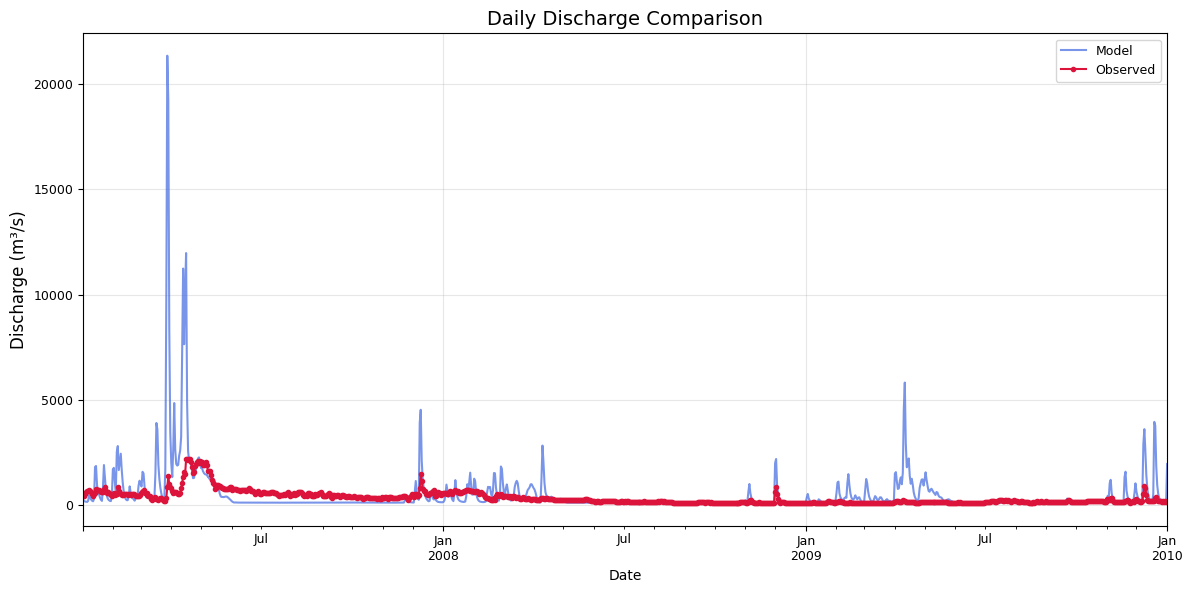

C:\Users\AAAli\AppData\Local\Temp\ipykernel_4576\2817506022.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.resample('M').mean(numeric_only=True)


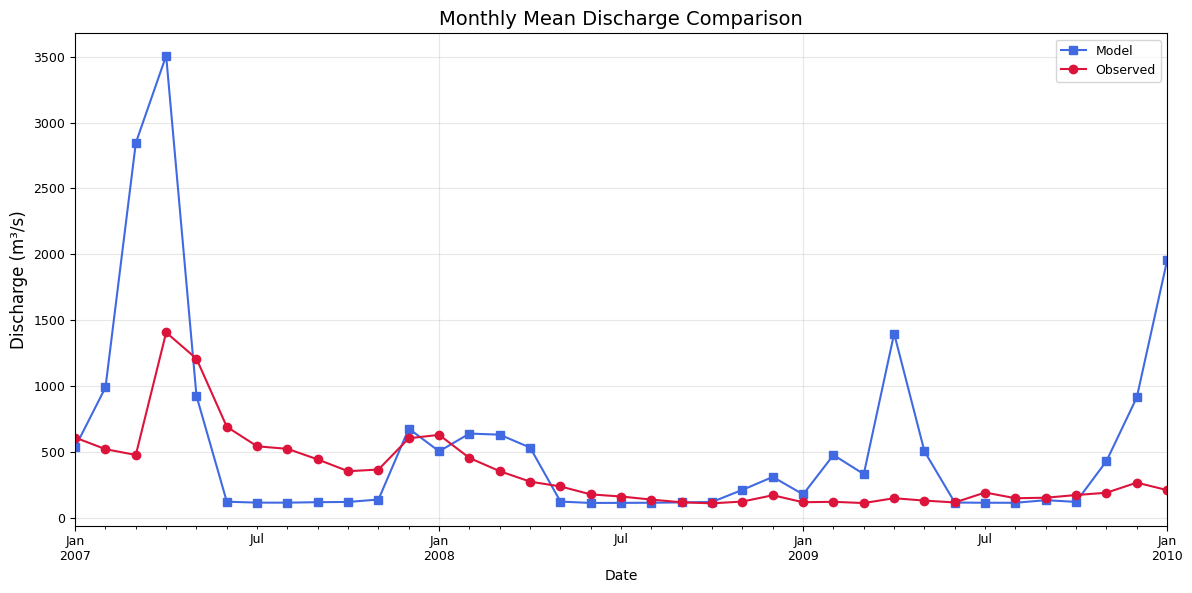


📊 Monthly Statistics:
Model Mean: 557.23 m³/s
Observed Mean: 347.92 m³/s
MAE: 377.06 m³/s
RMSE: 674.40 m³/s
NSE: -4.394


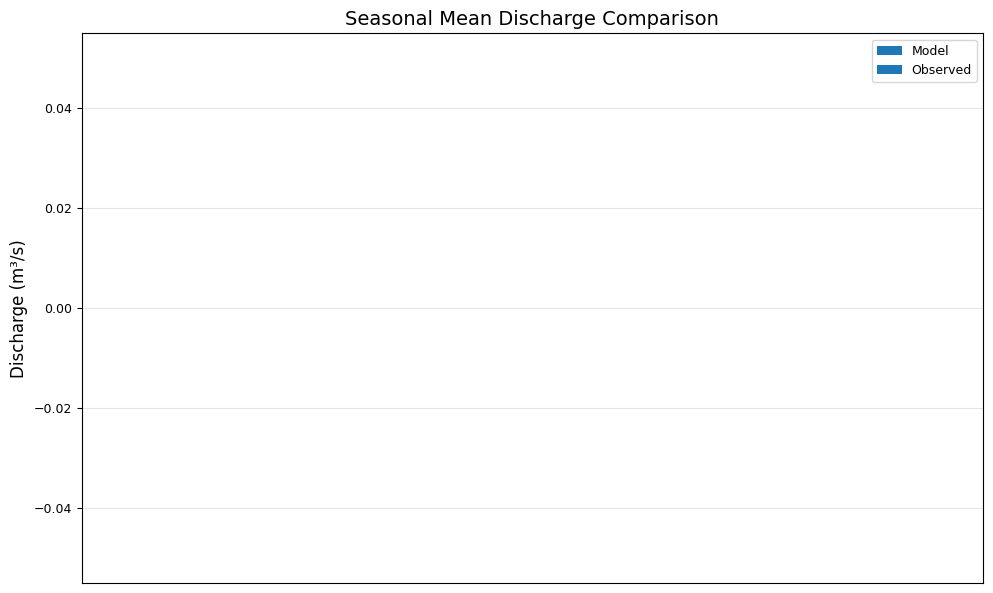


✅ Analysis complete!


In [22]:
# -*- coding: utf-8 -*-
"""
Model vs Observation Discharge Comparison at Ahvaz Station (Monthly & Seasonal Analysis!)
- Added monthly and seasonal aggregation
- Includes new visualizations and statistical comparisons
- All previous fixes for data loading and alignment included
"""

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ================== 1. Configuration ==================
model_path = r"Combined_Discharge_Data_2007_2009.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# ================== 2. Load and Prepare Model Data ==================
ds = xr.open_dataset(model_path)
dis = ds['dis24']  # Discharge variable

# Use xarray's built-in nearest neighbor selection
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)

print(f"\n✅ Model data extracted at:")
print(f"   Selected Latitude: {model_point.latitude.values:.6f}")
print(f"   Selected Longitude: {model_point.longitude.values:.6f}")
print(f"   Distance from target: {np.abs(target_lat - model_point.latitude.values):.4f}°, "
      f"{np.abs(target_lon - model_point.longitude.values):.4f}°")

model_ts = model_point.to_dataframe(name='model_discharge')

# ================== 3. Load Observation Data (FLEXIBLE DATE PARSING) ==================
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')  # Flexible parsing
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)

# Remove rows with invalid dates
if obs_df.index.hasnans:
    obs_df = obs_df.dropna(subset=['obs_discharge'])

# ================== 4. Align Time Periods ==================
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())
model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

print(f"\n⏱️ Common time period: {common_start.strftime('%Y-%m-%d')} to {common_end.strftime('%Y-%m-%d')}")
print(f"   Model data points: {len(model_common):d}")
print(f"   Observation data points: {len(obs_common):d}")

# ================== 5. Daily Comparison (Original) ==================
plt.figure(figsize=(12, 6))
model_common['model_discharge'].plot(label='Model', color='royalblue', alpha=0.7)
obs_common['obs_discharge'].plot(label='Observed', color='crimson', marker='o', markersize=3)
plt.title('Daily Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ================== 6. Monthly Aggregation ==================
def aggregate_monthly(data):
    monthly = data.resample('M').mean(numeric_only=True)
    monthly.index = monthly.index.to_period('M')  # Use period for better labeling
    return monthly

model_monthly = aggregate_monthly(model_common)
obs_monthly = aggregate_monthly(obs_common)

# Monthly comparison plot
plt.figure(figsize=(12, 6))
model_monthly['model_discharge'].plot(label='Model', color='royalblue', marker='s')
obs_monthly['obs_discharge'].plot(label='Observed', color='crimson', marker='o')
plt.title('Monthly Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Monthly statistics
if len(model_monthly) > 0 and len(obs_monthly) > 0:
    merged_monthly = pd.merge(model_monthly, obs_monthly, left_index=True, right_index=True, how='inner')
    print("\n📊 Monthly Statistics:")
    print(f"Model Mean: {merged_monthly['model_discharge'].mean():.2f} m³/s")
    print(f"Observed Mean: {merged_monthly['obs_discharge'].mean():.2f} m³/s")
    print(f"MAE: {mean_absolute_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge']):.2f} m³/s")
    print(f"RMSE: {np.sqrt(mean_squared_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge'])):.2f} m³/s")
    
    # NSE for monthly
    obs_mean_monthly = merged_monthly['obs_discharge'].mean()
    numerator = ((merged_monthly['obs_discharge'] - merged_monthly['model_discharge'])**2).sum()
    denominator = ((merged_monthly['obs_discharge'] - obs_mean_monthly)**2).sum()
    nse_monthly = 1 - (numerator / denominator) if denominator != 0 else float('nan')
    print(f"NSE: {nse_monthly:.3f}")

# ================== 7. Seasonal Aggregation ==================
def seasonal_group(data):
    # Define seasons: DJF, MAM, JJA, SON
    seasons = {
        'Winter': (data.index.month == 12) | (data.index.month <= 2),
        'Spring': (data.index.month >= 3) & (data.index.month <= 5),
        'Summer': (data.index.month >= 6) & (data.index.month <= 8),
        'Autumn': (data.index.month >= 9) & (data.index.month <= 11)
    }
    return data.groupby(seasons).mean(numeric_only=True)

# Apply seasonal grouping
model_seasonal = seasonal_group(model_common)
obs_seasonal = seasonal_group(obs_common)

# Seasonal comparison plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_seasonal.index))
width = 0.35
plt.bar(x - width/2, model_seasonal['model_discharge'], width, label='Model', color='royalblue')
plt.bar(x + width/2, obs_seasonal['obs_discharge'], width, label='Observed', color='crimson')
plt.title('Seasonal Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xticks(x, model_seasonal.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Seasonal statistics
if len(model_seasonal) > 0 and len(obs_seasonal) > 0:
    merged_seasonal = pd.merge(model_seasonal, obs_seasonal, left_index=True, right_index=True, how='inner')
    print("\n📊 Seasonal Statistics:")
    for season in merged_seasonal.index:
        mod = merged_seasonal.loc[season, 'model_discharge']
        obs = merged_seasonal.loc[season, 'obs_discharge']
        print(f"\n{season}:")
        print(f"  Model: {mod:.2f} m³/s | Observed: {obs:.2f} m³/s")
        print(f"  MAE: {mean_absolute_error([obs], [mod]):.2f} m³/s")
        print(f"  RMSE: {np.sqrt(mean_squared_error([obs], [mod])):.2f} m³/s")
        # NSE for single season
        nse_season = float('nan') if obs == 0 else 1 - ((obs - mod)**2) / ((obs - obs)**2)
        print(f"  NSE: {nse_season:.3f}")

print("\n✅ Analysis complete!")


=== Statistics BEFORE Bias Correction ===
Model vs Obs:
  MAE:  384.85 m³/s
  RMSE: 1208.99 m³/s
  NSE:  -12.129

=== Statistics AFTER Quantile Mapping Bias Correction ===
QM Model vs Obs:
  MAE:  277.46 m³/s
  RMSE: 463.11 m³/s
  NSE:  -0.926


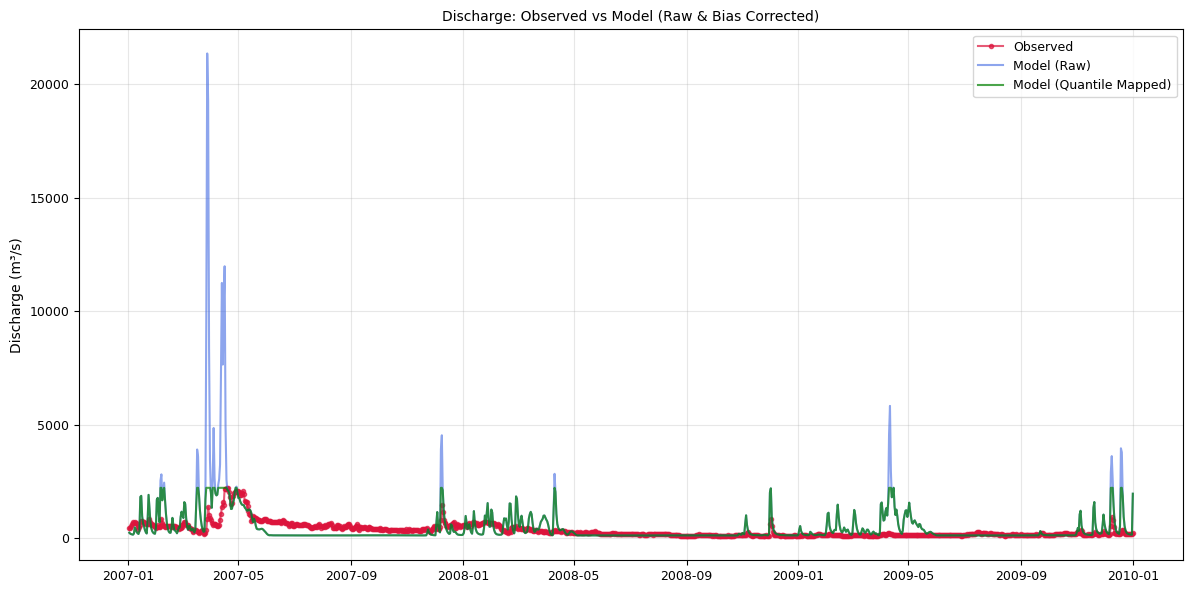

In [23]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ========== 1. Load Data ==========
model_path = r"Combined_Discharge_Data_2007_2009.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# --- Model Data ---
ds = xr.open_dataset(model_path)
dis = ds['dis24']
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)
model_ts = model_point.to_dataframe(name='model_discharge')

# --- Observation Data ---
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)
obs_df = obs_df[~obs_df.index.duplicated(keep='first')]  # Remove duplicate dates

# ========== 2. Align Data ==========
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())
model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

# Drop any NaNs (required for quantile mapping)
aligned = pd.concat([model_common, obs_common], axis=1, join='inner').dropna()
model_vals = aligned['model_discharge'].values.reshape(-1, 1)
obs_vals = aligned['obs_discharge'].values.reshape(-1, 1)

# ========== 3. Quantile Mapping Bias Correction ==========
qt = QuantileTransformer(output_distribution='normal', n_quantiles=min(100, len(obs_vals)))
qt.fit(obs_vals)
model_qm = qt.inverse_transform(qt.transform(model_vals)).flatten()
aligned['model_discharge_qm'] = model_qm

# ========== 4. Statistics ==========
def print_stats(label, obs, mod):
    mae = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse = 1 - np.sum((obs - mod) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
    print(f"{label}:")
    print(f"  MAE:  {mae:.2f} m³/s")
    print(f"  RMSE: {rmse:.2f} m³/s")
    print(f"  NSE:  {nse:.3f}")

print("\n=== Statistics BEFORE Bias Correction ===")
print_stats("Model vs Obs", aligned['obs_discharge'], aligned['model_discharge'])

print("\n=== Statistics AFTER Quantile Mapping Bias Correction ===")
print_stats("QM Model vs Obs", aligned['obs_discharge'], aligned['model_discharge_qm'])

# ========== 5. Plot ==========
plt.figure(figsize=(12, 6))
plt.plot(aligned.index, aligned['obs_discharge'], label='Observed', color='crimson', marker='o', markersize=3, alpha=0.7)
plt.plot(aligned.index, aligned['model_discharge'], label='Model (Raw)', color='royalblue', alpha=0.6)
plt.plot(aligned.index, aligned['model_discharge_qm'], label='Model (Quantile Mapped)', color='green', alpha=0.7)
plt.title('Discharge: Observed vs Model (Raw & Bias Corrected)')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== RAW MODEL vs OBS ===
Raw                       | MAE:  384.85 | RMSE:  1208.99 | NSE: -12.129

=== AFTER GLOBAL QM ===
QM Full                   | MAE:  277.46 | RMSE:   463.11 | NSE:  -0.926

=== AFTER SEASONAL QM ===
QM Seasonal               | MAE:  239.01 | RMSE:   387.40 | NSE:  -0.348

=== AFTER GPD TAIL CORRECTION ===
QM Seasonal + Tail        | MAE:  235.35 | RMSE:   373.43 | NSE:  -0.253


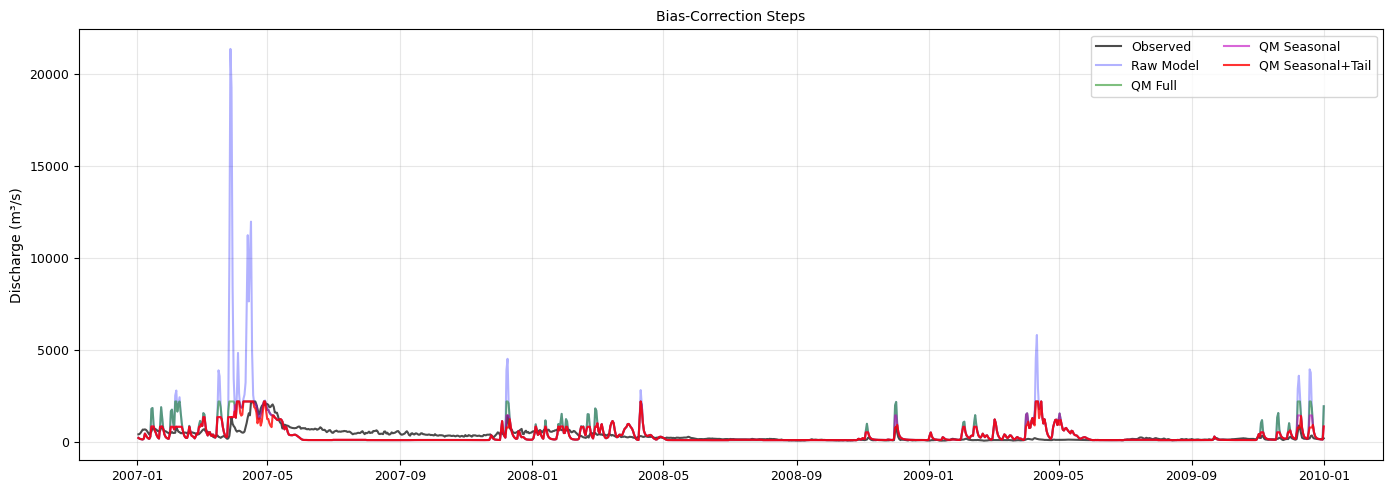

In [25]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import genpareto

# ======== 1. CONFIGURATION ========
model_path   = r"Combined_Discharge_Data_2007_2009.nc"
obs_path     = r"Observation_Data_Ahvaz.csv"
target_lat   = 31.333333
target_lon   = 48.683333
tail_percent = 0.95   # threshold for GPD tail fitting

# ======== 2. LOAD & ALIGN DATA ========
# 2.1 Model
ds        = xr.open_dataset(model_path)
dis       = ds['dis24']
model_pt  = dis.sel(latitude=target_lat,
                    longitude=target_lon,
                    method="nearest",
                    tolerance=0.5)
model_ts  = model_pt.to_dataframe(name='model_discharge')

# 2.2 Observation
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df.rename(columns={'Value':'obs_discharge'}, inplace=True)
obs_df.set_index('Date', inplace=True)

# 2.3 Align in time & drop NaNs
start = max(model_ts.index.min(), obs_df.index.min())
end   = min(model_ts.index.max(), obs_df.index.max())
df = pd.concat([
        model_ts.loc[start:end],
        obs_df.loc[start:end]
    ], axis=1, join='inner').dropna()

# helper for stats
def stats(name, o, m):
    mae  = mean_absolute_error(o,m)
    rmse = np.sqrt(mean_squared_error(o,m))
    nse  = 1 - np.sum((o-m)**2) / np.sum((o-np.mean(o))**2)
    print(f"{name:25s} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

print("\n=== RAW MODEL vs OBS ===")
stats("Raw", df['obs_discharge'], df['model_discharge'])

# ======== 3. GLOBAL QUANTILE MAPPING ========
# Extract arrays
obs_vals = df['obs_discharge'].values.reshape(-1,1)
mod_vals = df['model_discharge'].values.reshape(-1,1)

qt_global = QuantileTransformer(
    output_distribution='normal',
    n_quantiles=min(100, len(df))
).fit(obs_vals)

qm_full = qt_global.inverse_transform(qt_global.transform(mod_vals)).flatten()
df['model_qm_full'] = qm_full

print("\n=== AFTER GLOBAL QM ===")
stats("QM Full", df['obs_discharge'], df['model_qm_full'])

# ======== 4. SEASONAL (MONTHLY) QUANTILE MAPPING ========
def seasonal_qm(obs_s, mod_s, n_quantiles=100):
    """Monthly quantile‐map mod_s to obs_s."""
    tmp = pd.DataFrame({'obs': obs_s, 'mod': mod_s})
    tmp['month'] = tmp.index.month
    out = pd.Series(index=tmp.index, dtype=float)

    for m, grp in tmp.groupby('month'):
        o_arr = grp['obs'].values.reshape(-1,1)
        m_arr = grp['mod'].values.reshape(-1,1)
        qt = QuantileTransformer(
            output_distribution='normal',
            n_quantiles=min(n_quantiles, len(grp))
        ).fit(o_arr)
        corrected = qt.inverse_transform(qt.transform(m_arr)).flatten()
        out.loc[grp.index] = corrected

    return out

df['model_qm_seasonal'] = seasonal_qm(
    df['obs_discharge'],
    df['model_discharge'],
    n_quantiles=100
)

print("\n=== AFTER SEASONAL QM ===")
stats("QM Seasonal", df['obs_discharge'], df['model_qm_seasonal'])

# ======== 5. GPD TAIL CORRECTION ========
def gpd_tail(obs_s, mod_s, tail_p=0.95):
    """Correct the upper tail of mod_s to match obs_s."""
    thr_obs = obs_s.quantile(tail_p)
    thr_mod = mod_s.quantile(tail_p)

    # exceedances above threshold
    ex_obs = obs_s[obs_s>thr_obs] - thr_obs
    ex_mod = mod_s[mod_s>thr_mod] - thr_mod

    # if too few points, skip
    if len(ex_obs)<5 or len(ex_mod)<5:
        return mod_s.copy()

    # fit GPD
    params_obs = genpareto.fit(ex_obs)
    params_mod = genpareto.fit(ex_mod)

    corrected = mod_s.copy()
    mask = mod_s>thr_mod
    tail_vals = (mod_s[mask] - thr_mod).values
    cdf_vals  = genpareto.cdf(tail_vals, *params_mod)
    new_ex    = genpareto.ppf(cdf_vals, *params_obs)

    corrected.loc[mask] = thr_obs + new_ex
    return corrected

df['model_qm_tail'] = gpd_tail(
    df['obs_discharge'],
    df['model_qm_seasonal'],
    tail_p=tail_percent
)

print("\n=== AFTER GPD TAIL CORRECTION ===")
stats("QM Seasonal + Tail", df['obs_discharge'], df['model_qm_tail'])

# ======== 6. PLOT ALL SERIES ========
plt.figure(figsize=(14,5))
plt.plot(df.index, df['obs_discharge'],      'k-', label='Observed', alpha=0.7)
plt.plot(df.index, df['model_discharge'],     'b-', label='Raw Model', alpha=0.3)
plt.plot(df.index, df['model_qm_full'],       'g-', label='QM Full', alpha=0.5)
plt.plot(df.index, df['model_qm_seasonal'],   'm-', label='QM Seasonal', alpha=0.6)
plt.plot(df.index, df['model_qm_tail'],       'r-', label='QM Seasonal+Tail', alpha=0.8)
plt.legend(ncol=2)
plt.title("Bias‐Correction Steps")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

✅ Model downscaled to 0.008° and extracted at (31.335000, 48.683000)
⏱ Aligned period: 2007-01-02 to 2010-01-01 (1096 days)

=== RAW MODEL vs OBS ===
Raw                       | MAE:  351.65 | RMSE:  1043.40 | NSE:  -8.779

=== AFTER GLOBAL QM ===
QM Full                   | MAE:  266.60 | RMSE:   432.79 | NSE:  -0.682

=== AFTER SEASONAL QM ===
QM Seasonal               | MAE:  233.98 | RMSE:   370.57 | NSE:  -0.233

=== AFTER GPD TAIL CORRECTION ===
QM Seasonal + Tail        | MAE:  230.94 | RMSE:   360.66 | NSE:  -0.168


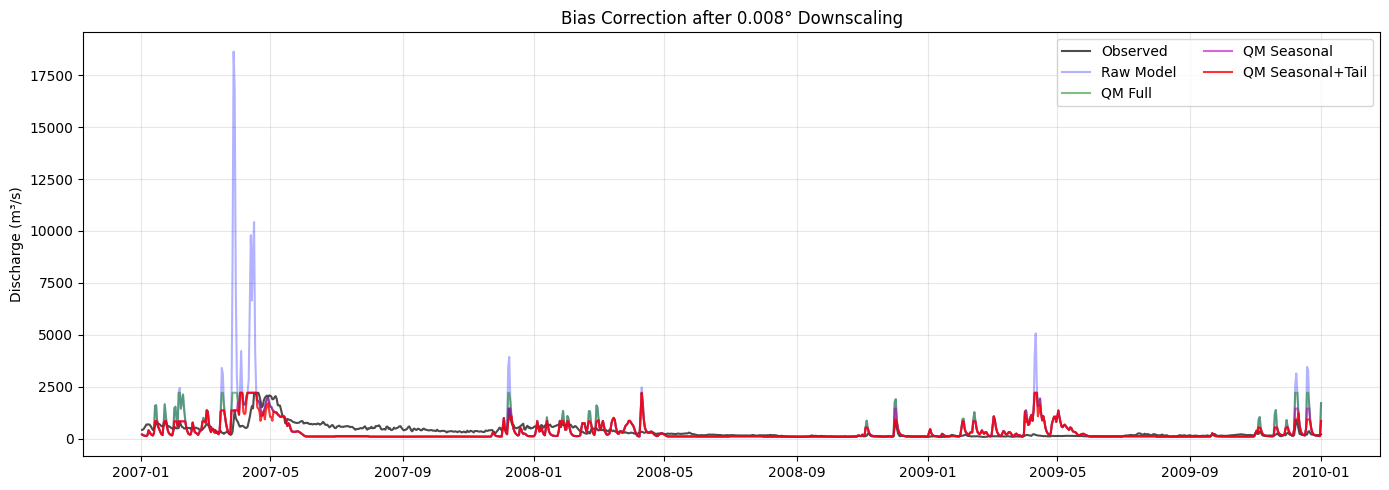

In [4]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import genpareto

# ======== 1. CONFIGURATION ========
model_path   = r"Combined_Discharge_Data_2007_2009.nc"
obs_path     = r"Observation_Data_Ahvaz.csv"
target_lat   = 31.333333
target_lon   = 48.683333
new_res      = 0.008        # high-res grid spacing in degrees
tail_percent = 0.95         # percentile for GPD tail fit

# ======== 2. LOAD & DOWNSCALE MODEL DATA ========
# 2.1 Open original NetCDF
ds = xr.open_dataset(model_path)

# 2.2 Build high-res lat/lon coordinates
lat_min, lat_max = float(ds.latitude.min()), float(ds.latitude.max())
lon_min, lon_max = float(ds.longitude.min()), float(ds.longitude.max())
lat_hr = np.arange(lat_min, lat_max + new_res, new_res)
lon_hr = np.arange(lon_min, lon_max + new_res, new_res)

# 2.3 Interpolate (linear) onto fine grid
ds_hr = ds.interp(latitude=lat_hr, longitude=lon_hr, method="linear")

# 2.4 Extract daily discharge at nearest hi-res grid cell
dis_hr   = ds_hr["dis24"]
model_pt = dis_hr.sel(
    latitude=target_lat,
    longitude=target_lon,
    method="nearest",
    tolerance=new_res
)
model_ts = model_pt.to_dataframe(name="model_discharge")
print(f"✅ Model downscaled to {new_res}° and extracted at "
      f"({model_pt.latitude.values:.6f}, {model_pt.longitude.values:.6f})")

# ======== 3. LOAD & PREPARE OBSERVATION DATA ========
obs_df = pd.read_csv(obs_path)
obs_df["Date"] = pd.to_datetime(obs_df["Date"], errors="coerce")
obs_df = obs_df.rename(columns={"Value":"obs_discharge"})
obs_df = obs_df.set_index("Date")

# ======== 4. ALIGN TIME PERIOD ========
start = max(model_ts.index.min(), obs_df.index.min())
end   = min(model_ts.index.max(), obs_df.index.max())
df = pd.concat([
    model_ts.loc[start:end],
    obs_df.loc[start:end]
], axis=1, join="inner").dropna()
print(f"⏱ Aligned period: {start.date()} to {end.date()} ({len(df)} days)")

# helper: print stats
def stats(name, o, m):
    mae  = mean_absolute_error(o, m)
    rmse = np.sqrt(mean_squared_error(o, m))
    nse  = 1 - np.sum((o-m)**2) / np.sum((o-np.mean(o))**2)
    print(f"{name:25s} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# ======== 5. RAW STATISTICS ========
print("\n=== RAW MODEL vs OBS ===")
stats("Raw", df["obs_discharge"], df["model_discharge"])

# ======== 6. GLOBAL QUANTILE MAPPING ========
obs_vals = df["obs_discharge"].values.reshape(-1,1)
mod_vals = df["model_discharge"].values.reshape(-1,1)
qt_global = QuantileTransformer(
    output_distribution="normal",
    n_quantiles=min(100, len(df))
).fit(obs_vals)
qm_full = qt_global.inverse_transform(qt_global.transform(mod_vals)).flatten()
df["model_qm_full"] = qm_full

print("\n=== AFTER GLOBAL QM ===")
stats("QM Full", df["obs_discharge"], df["model_qm_full"])

# ======== 7. SEASONAL (MONTHLY) QUANTILE MAPPING ========
def seasonal_qm(obs_s, mod_s, n_quantiles=100):
    tmp = pd.DataFrame({"obs":obs_s, "mod":mod_s})
    tmp["month"] = tmp.index.month
    out = pd.Series(index=tmp.index, dtype=float)
    for m, grp in tmp.groupby("month"):
        o_arr = grp["obs"].values.reshape(-1,1)
        m_arr = grp["mod"].values.reshape(-1,1)
        qt = QuantileTransformer(
            output_distribution="normal",
            n_quantiles=min(n_quantiles, len(grp))
        ).fit(o_arr)
        out.loc[grp.index] = qt.inverse_transform(qt.transform(m_arr)).flatten()
    return out

df["model_qm_seasonal"] = seasonal_qm(
    df["obs_discharge"],
    df["model_discharge"],
    n_quantiles=100
)
print("\n=== AFTER SEASONAL QM ===")
stats("QM Seasonal", df["obs_discharge"], df["model_qm_seasonal"])

# ======== 8. GPD TAIL CORRECTION ========
def gpd_tail(obs_s, mod_s, tail_p=0.95):
    thr_obs = obs_s.quantile(tail_p)
    thr_mod = mod_s.quantile(tail_p)
    ex_obs = obs_s[obs_s>thr_obs] - thr_obs
    ex_mod = mod_s[mod_s>thr_mod] - thr_mod
    if len(ex_obs)<5 or len(ex_mod)<5:
        return mod_s.copy()
    p_obs = genpareto.fit(ex_obs)
    p_mod = genpareto.fit(ex_mod)
    corrected = mod_s.copy()
    mask = mod_s>thr_mod
    tail_vals = (mod_s[mask] - thr_mod).values
    cdf_vals  = genpareto.cdf(tail_vals, *p_mod)
    new_ex    = genpareto.ppf(cdf_vals, *p_obs)
    corrected.loc[mask] = thr_obs + new_ex
    return corrected

df["model_qm_tail"] = gpd_tail(
    df["obs_discharge"],
    df["model_qm_seasonal"],
    tail_p=tail_percent
)
print("\n=== AFTER GPD TAIL CORRECTION ===")
stats("QM Seasonal + Tail", df["obs_discharge"], df["model_qm_tail"])

# ======== 9. FINAL PLOT ========
plt.figure(figsize=(14,5))
plt.plot(df.index, df["obs_discharge"],      "k-",  label="Observed", alpha=0.7)
plt.plot(df.index, df["model_discharge"],     "b-",  label="Raw Model", alpha=0.3)
plt.plot(df.index, df["model_qm_full"],       "g-",  label="QM Full", alpha=0.5)
plt.plot(df.index, df["model_qm_seasonal"],   "m-",  label="QM Seasonal", alpha=0.6)
plt.plot(df.index, df["model_qm_tail"],       "r-",  label="QM Seasonal+Tail", alpha=0.8)
plt.legend(ncol=2)
plt.title("Bias Correction after 0.008° Downscaling")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Data aligned from 2007-01-02 to 2010-01-01 (1096 days)

=== RAW MODEL vs OBS ===
Raw Model                 | MAE:  384.85 | RMSE:  1208.99 | NSE: -12.129

Running 5-fold time-series CV with Random Forest...
 Fold 1/5 | MAE:  134.28 | RMSE:   156.69 | NSE:  -0.355
 Fold 2/5 | MAE:  258.81 | RMSE:   340.49 | NSE:  -3.314
 Fold 3/5 | MAE:  310.39 | RMSE:   329.69 | NSE: -18.242
 Fold 4/5 | MAE:  407.66 | RMSE:   490.23 | NSE: -472.699
 Fold 5/5 | MAE:  180.96 | RMSE:   236.23 | NSE:  -5.976
 CV mean              | MAE:  258.42 | RMSE:   310.67 | NSE: -100.117

Training final Random Forest on full record...

=== RANDOM FOREST CORRECTED ===
RF Corrected              | MAE:   55.23 | RMSE:    80.44 | NSE:   0.942


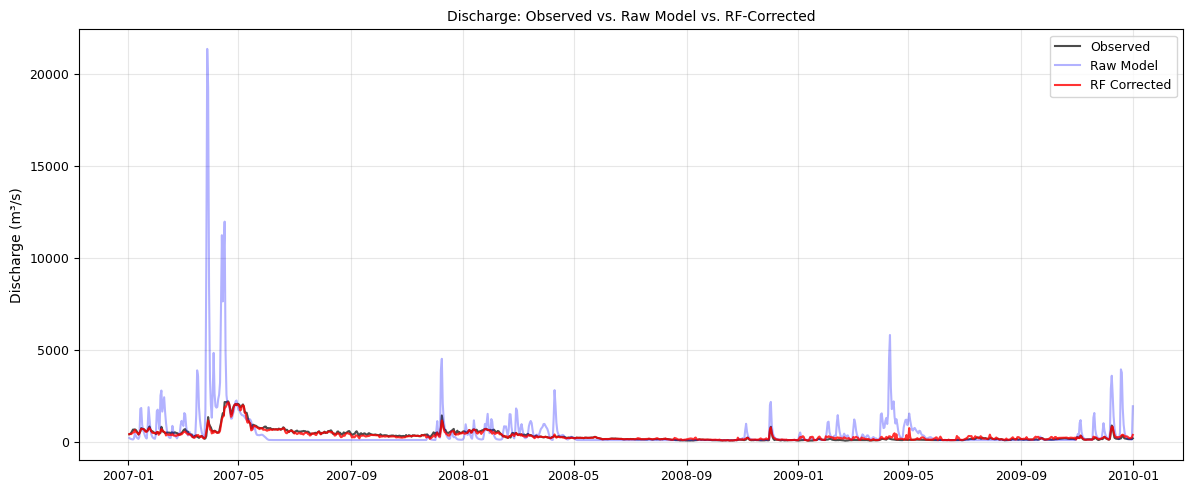

In [29]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ======== 1. CONFIGURATION ========
model_path = r"Combined_Discharge_Data_2007_2009.nc"
obs_path   = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# Random Forest hyperparameters
RF_PARAMS = {
    'n_estimators': 300,
    'max_depth': 12,
    'random_state': 42,
    'n_jobs': -1
}

# Number of time-series CV splits
N_SPLITS = 5

# ======== 2. LOAD & ALIGN DATA ========
# 2.1 Load model discharge and select nearest grid cell
ds       = xr.open_dataset(model_path)
dis24    = ds['dis24']
model_pt = dis24.sel(
    latitude=target_lat,
    longitude=target_lon,
    method='nearest',
    tolerance=0.5
)
model_ts = model_pt.to_dataframe(name='model_discharge')

# 2.2 Load observed discharge
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df.rename(columns={'Value': 'obs_discharge'}, inplace=True)
obs_df.set_index('Date', inplace=True)

# 2.3 Align on common period and drop any NaNs
start = max(model_ts.index.min(), obs_df.index.min())
end   = min(model_ts.index.max(), obs_df.index.max())
df = pd.concat([
    model_ts.loc[start:end],
    obs_df.loc[start:end]
], axis=1, join='inner').dropna()

print(f"Data aligned from {start.date()} to {end.date()} ({len(df)} days)")

# Helper to print stats
def print_stats(label, obs, mod):
    mae  = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse  = 1 - np.sum((obs-mod)**2) / np.sum((obs-np.mean(obs))**2)
    print(f"{label:25s} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# Raw model performance
print("\n=== RAW MODEL vs OBS ===")
print_stats("Raw Model", df['obs_discharge'], df['model_discharge'])

# ======== 3. FEATURE ENGINEERING ========
# Simple features: raw model discharge, month, day-of-year
X = pd.DataFrame({
    'model_discharge': df['model_discharge'],
    'month':           df.index.month,
    'dayofyear':       df.index.dayofyear
}, index=df.index)

y = df['obs_discharge']

# ======== 4. TIME-SERIES CROSS-VALIDATION ========
tscv = TimeSeriesSplit(n_splits=N_SPLITS)
cv_scores = []

print(f"\nRunning {N_SPLITS}-fold time-series CV with Random Forest...")
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf = RandomForestRegressor(**RF_PARAMS)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    nse  = 1 - np.sum((y_test-y_pred)**2) / np.sum((y_test-np.mean(y_test))**2)
    cv_scores.append((mae, rmse, nse))

    print(f" Fold {fold}/{N_SPLITS} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# Aggregate CV scores
mae_cv, rmse_cv, nse_cv = np.mean(cv_scores, axis=0)
print(f" CV mean              | MAE: {mae_cv:7.2f} | RMSE: {rmse_cv:8.2f} | NSE: {nse_cv:7.3f}")

# ======== 5. FINAL MODEL FIT & PREDICT ========
print("\nTraining final Random Forest on full record...")
rf_final = RandomForestRegressor(**RF_PARAMS)
rf_final.fit(X, y)

df['model_rf'] = rf_final.predict(X)

print("\n=== RANDOM FOREST CORRECTED ===")
print_stats("RF Corrected", df['obs_discharge'], df['model_rf'])

# ======== 6. PLOT RESULTS ========
plt.figure(figsize=(12,5))
plt.plot(df.index, df['obs_discharge'],   'k-',  label='Observed', alpha=0.7)
plt.plot(df.index, df['model_discharge'],'b-',  label='Raw Model', alpha=0.3)
plt.plot(df.index, df['model_rf'],        'r-',  label='RF Corrected', alpha=0.8)
plt.legend()
plt.title("Discharge: Observed vs. Raw Model vs. RF-Corrected")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()